# Ridge Regression Using Gradient Descent:

Ridge Regression is a linear regression algorithm that adds a regularization term to the cost function. The regularization term penalizes large coefficients, preventing overfitting.

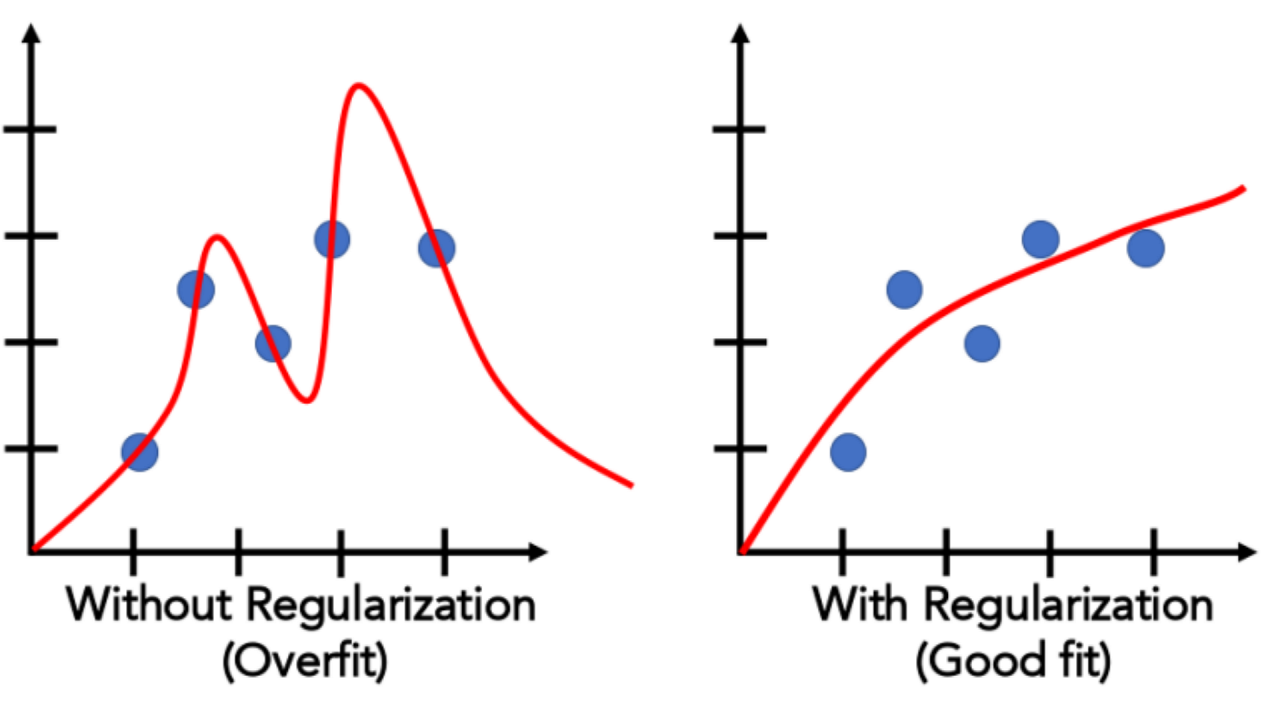

## Prerequisites

For this repository I assumes that you are already familiar with [Linear Regression](https://github.com/nikitaprasad21/ML-Cheat-Codes/tree/main/Linear-Regression) and [Ridge Regression](https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Linear-Regression/ridge-regression.ipynb). If you are not, I very highly recommend you checkout my previous repositories.

## Problem with Regular Linear Regression?

* Regular Linear regression can overfit the data, leading to poor generalization.
* Overfitting occurs when the model captures noise rather than true underlying patterns.
* Ridge Regression aims to stabilize vanilla linear regression.

## Solving Ridge Regression

Just like with Linear Regression, we can solve Ridge Regression with the same methods and techniques we used to solve OLS regression.

These were solving:

### **1. Using Normal Equation** 

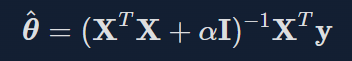

where,

      I: Identity matrix with dimensions (n+1) * (n+1)
      X: 1 + Feature vector for input features.
      y: Target variable.
      α: Ridge Parameter
      Theta Hat: Vector of coefficients (weights) that Ridge Regression aims to estimate.

Refer to my [this repository](https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Linear-Regression/ridge-regression.ipynb) to know get better understanding of Ridge Regression using Normal Equation.

### **2. Using Gradient Descent**

Alternatively to solving the normal equation, we can differentiate the ridge cost function to obtain its partial derivatives (i.e. compute its gradient) and then perform gradient descent to iteratively approach the optimal solution.

*I recommend that you go through my other repositaries to know more about [Gradient Descent](https://github.com/nikitaprasad21/ML-Cheat-Codes/blob/main/Linear-Regression/multiple-linear-regression.ipynb).*


Let's delve into the practical example to understand this concept better.


## Importing Dataset

In this implementation I am using Diabetes Data of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [2]:
from sklearn.datasets import load_diabetes
import numpy as np

In [3]:
(inputs, target) = load_diabetes(return_X_y = True) 

print('inputs.shape:' , inputs.shape)
print('target.shape:' ,target.shape)

inputs.shape: (442, 10)
target.shape: (442,)


## Splitting data into train and test datasets

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2 , random_state = 42)

Note: It is very advisable to Standarize your dataset before applying Linear Models to reduce Time Complexity by approaching fast towards the decent.

Here, I'm not applying DataStandardization because the dataset is already in Similar Range of all the axis.

## Applying SGDRegressor on our dataset

In [7]:
from sklearn.linear_model import SGDRegressor

In [8]:
sgd = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.01)

where, 
     
     penalty = l2 - Ridge Regression,
     alpha = 0.01

In [10]:
from sklearn.metrics import r2_score

In [11]:
sgd.fit(train_inputs, train_target)
sgd_pred = sgd.predict(test_inputs)

In [14]:
print("SGDRegressor R2 Score: ",r2_score(test_target,sgd_pred))
print("\n")
print("SGDRegressor Coefficients: ", sgd.coef_)
print("\n")
print("SGDRegressor Intercept: ",sgd.intercept_)

SGDRegressor R2 Score:  0.3004172786714534


SGDRegressor Coefficients:  [ 34.86689646 -14.98301288 144.03626138 105.29821742  21.52201975
   8.43170376 -84.23455966  81.71756849 124.36464291  76.89029399]


SGDRegressor Intercept:  [151.68758671]


Let's compare this with Ridge Regression.

## Applying Ridge Regression

In [15]:
from sklearn.linear_model import Ridge

In [17]:
rr = Ridge(alpha=0.01, max_iter=500,solver='sparse_cg')

where,
   
    solver = ‘sparse_cg’ uses the conjugate `gradient solver` as found in scipy.sparse.linalg.cg.

In [18]:
rr.fit(train_inputs, train_target)
rr_pred = rr.predict(test_inputs)

In [19]:
print("RRegressor R2 Score: ",r2_score(test_target,rr_pred))
print("\n")
print("RRegressor Coefficients: ", rr.coef_)
print("\n")
print("RRegressor Intercept: ",rr.intercept_)

RRegressor R2 Score:  0.4559819503708987


RRegressor Coefficients:  [  40.69342283 -237.00801874  546.16179338  341.80931895 -430.14629753
  129.90230302  -60.46081887  203.99084491  541.09802739   55.48255495]


RRegressor Intercept:  151.3365966191102


Certainly, the R2 Score of Ridge Regressor is better than SGDRegressor, can be attributed to the differences in the algorithms and hyperparameters tuning strategies used by these models.

**Ridge Regressor**: Adds a penalty term to the linear regression cost function to prevent overfitting.

**SGDRegressor**: It employs the stochastic gradient descent optimization algorithm, which iteratively updates the model parameters to minimize the cost function. 

It may converge to different parameter values compared to Ridge regression.

## Step-by-step Implementation of Ridge Regression using Batch Gradient Descent:

**1. Initialization**:

Set the learning rate (learning_rate), regularization parameter (alpha), and the number of iterations (epochs).
Initialize the intercept (intercept) to 0.
Initialize the coefficients (coefficients) to ones, one for each feature.

**2. Gradient Descent Iterations**:

For each iteration (epoch):
-- Calculate the derivative of the cost function with respect to the coefficients (coefficients_derivative).

-- Involves matrix multiplication of transposed input features and the difference between predicted and actual values.

-- Add the regularization term (alpha * coefficients).

-- Update the coefficients using the gradient descent update rule:
`coefficients = coefficients - (learning_rate * coefficients_derivative)`.

**3. Intercept and Coefficient Update**:

Extract the intercept and coefficients from the updated parameters.

**4. Prediction**:

Use the final intercept and coefficients to make predictions on new data.
`prediction = dot(test_inputs, coefficients) + intercept`.

**5. Evaluation**:

Evaluate the model using a performance metric, such as R-squared (r2_score), on a test dataset.
`r2_score = 1 - (sum of squared residuals / total sum of squares)`.

**6. Results**:

Return the final coefficients, intercept, and the performance metric.

## Building our own Ridge Regression using Batch Gradient Descent. 

In [34]:
class RidgeGDRegressor():
    
    def __init__(self, alpha = 0.01, learning_rate = 0.1, epochs = 200):
        self.coeff = None
        self.intcpt = None
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.epochs = epochs

    # Creating 'fit' Function
    def fit(self, train_inputs, train_target):
        
        # In Multiple Linear Regression, it is advisable to choose the starting point of intercept = 0 and coeffients = 1
        
        # Staring with initializing intercept = 0  
        self.intcpt = 0
        
        # Staring with initializing coefficients = 1
        self.coeff = np.ones(train_inputs.shape[1]) # Using train_inputs.shape[1] for the number of features
        
        # The numpy.insert() function inserts values along the mentioned axis before the given indices.
        train_inputs = np.insert(train_inputs, 0, 1, axis = 1) # Syntax : numpy.insert(array, object, values, axis = None) 
        
        # Create a vector of coefficients (betas) that includes the intercept term.
        betas = np.insert(self.coeff, 0, self.intcpt)
        
        # Starting iteration loop 
        for i in range(self.epochs):
            
            # Vectorization
            # Calculating the derivative of betas values
            betas_derivative = (np.dot(train_inputs.T, train_inputs).dot(betas)) - (np.dot(train_inputs.T, train_target)) + (betas * self.alpha)
            
            # Updating all the betas values
            betas = betas - (self.learning_rate * betas_derivative)
    
        
        # Calculating intercept of the line (beta-not):
        self.intcpt = betas[0]
        
        
        # Calculating coefficent of the line(all betas):
        self.coeff = betas[1:]
        
    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff) + self.intcpt
    
    
    # R2 - scoring for Metric Evaluation 
    def score(self, test_inputs, test_target):
        predictions = self.predict(test_inputs)
        r2 = r2_score(test_target, predictions)
        return r2

In [55]:
rgd = RidgeGDRegressor(epochs=500,alpha=0.01,learning_rate=0.001)

In [56]:
rgd.fit(train_inputs, train_target)

r2 = rgd.score(test_inputs, test_target)

In [57]:
print("RGDRegressor R2 Score: ",r2)
print("\n")
print("RGD Coefficients: ", rgd.coefficients)
print("\n")
print("RGDRegressor Intercept: ",rgd.intercept)

RGDRegressor R2 Score:  0.40587212242703685


RGD Coefficients:  [  55.70592843  -35.87856132  249.97348272  179.5222297    31.08042214
    8.02324766 -137.57963477  131.28880655  209.67041369  129.03827819]


RGDRegressor Intercept:  152.35606426034602


The slight difference in performance between sklearn's Ridge Regressor model and my custom RidgeGDRegressor (RGD) Class implementation can be attributed to several factors such as Hyperparameter Tuning, Random Initialization, Convergence Criteria, and Regularization.

By systematically evaluating these factors, you can identify the specific reasons behind the performance differences and refine your custom RGD implementation accordingly.

## Applying Stochastic Rigid Regression

`solver= ‘sag’` uses a Stochastic Average Gradient descent, use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large.

In [58]:
srr = Ridge(alpha=0.01, max_iter=500,solver='sag')

In [59]:
srr.fit(train_inputs, train_target)
srr_pred = srr.predict(test_inputs)

In [60]:
print("RRegressor R2 Score: ",r2_score(test_target,srr_pred))
print("\n")
print("RRegressor Coefficients: ", srr.coef_)
print("\n")
print("RRegressor Intercept: ",srr.intercept_)

RRegressor R2 Score:  0.45598321723267965


RRegressor Coefficients:  [  40.69589893 -237.00719589  546.16648184  341.80319373 -429.8522
  129.67620131  -60.59270008  203.95320449  540.98532948   55.48765329]


RRegressor Intercept:  151.33658426719


Note: We are not using solver='saga' because the SAGA solver is a variant of SAG that also supports the non-smooth penalty L1 option (i.e. L1 Regularization/ Lasso Regression).

### Key Considerations:

* **Learning Rate (η)**: Critical for convergence; too large may lead to divergence, too small may slow convergence.
* **Regularization Parameter (α)**: Controls impact of regularization; tuning is crucial.
* **Normalization of Features**: Ridge Regression is sensitive to feature scales.

*Note: I have built a custom class to facilitate a better understanding of Ridge Regression using Gradient Descent. Consequently, I would recommend utilizing the scikit-learn library for the development of your model.*

> Stay tuned for Polynomial Regression and Don't forget to **Star** this Github Repository for more such contents and consider sharing with others.